In [65]:
!pip install aif360


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [86]:
from aif360.datasets import AdultDataset
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("/Users/sofianeagounikaci/bnp/adult.csv")

In [87]:
import numpy as np

pd.set_option("display.max_columns", 14)


In [88]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [89]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [71]:
data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,...,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,...,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,...,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,...,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,...,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,...,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,...,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,...,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,...,White,Male,0,0,20,United-States,<=50K


In [93]:
var_cat = data1.select_dtypes(["object"]).columns


In [94]:
var_cat

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'target'],
      dtype='object')

In [116]:
for var in var_cat:
    print(data1[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         

In [110]:
data1=data1.replace(" ?",np.nan)

In [112]:
data1.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [137]:
data2=data1.dropna()
data2=data2.drop("fnlwgt",axis=1)

In [138]:
data2.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [139]:
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [140]:
from sklearn.preprocessing import LabelEncoder

label=[]

for var in var_cat:
    le=LabelEncoder()
    data2[var]=le.fit_transform(data2[var])


In [141]:
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,11,9,4,0,3,4,1,0,0,20,38,0


In [142]:
from sklearn.model_selection import train_test_split


In [143]:
trainset,testset=train_test_split(data2,test_size=0.2, random_state=0)

In [144]:
y_train=trainset["target"]
X_train=trainset.drop(["target"],axis=1)

In [145]:
y_test=testset["target"]
X_test=testset.drop(["target"],axis=1)

Accuracy: 0.8425327366152826
Precision: 0.7130703789636504
Recall: 0.6142571618920719
F1 Score: 0.6599856836077308

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4532
           1       0.71      0.61      0.66      1501

    accuracy                           0.84      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033



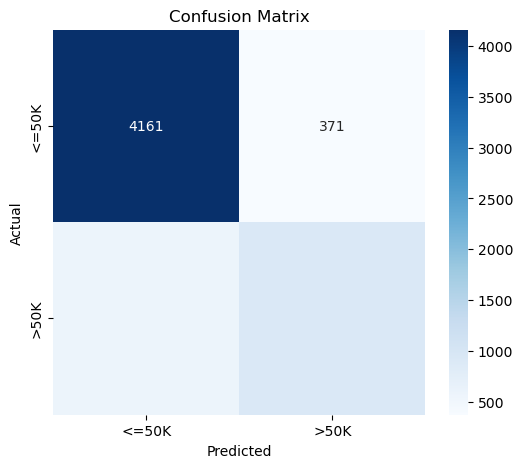

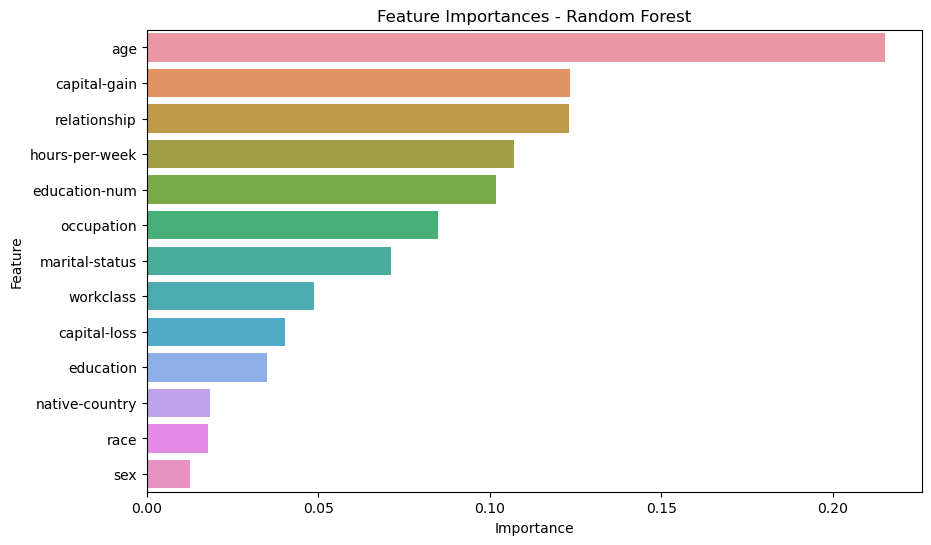

In [152]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -----------------------------
# 7️⃣ Prédiction
# -----------------------------
y_pred = rf.predict(X_test)

# -----------------------------
# 8️⃣ Évaluation
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# -----------------------------
# 9️⃣ Matrice de confusion + heatmap
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# 🔟 Feature importance (barplot)
# -----------------------------
importances = rf.feature_importances_
feature_names = X_test.columns

# Créer un DataFrame pour mieux trier
feat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_df)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [164]:
data1=data1.replace(" ?",np.nan)
data1=data1.dropna()

In [208]:
data6=pd.read_csv("/Users/sofianeagounikaci/bnp/adult.csv")
data6["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [206]:
data["sex"].value_counts()

sex
1    21790
0    10771
Name: count, dtype: int64

In [207]:
data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,...,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,...,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,...,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,...,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,...,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,...,White,0,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,...,White,0,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,...,White,0,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,...,White,0,0,0,20,United-States,0


In [171]:
import pandas as pd
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric



dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],              # votre target
    protected_attribute_names=["sex"]    # votre variable protégée
)

In [173]:
dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],              # votre target
    protected_attribute_names=["sex"]    # votre variable protégée
    
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"sex": 1}],
    unprivileged_groups=[{"sex": 0}]
)

metrics_dict = {
    "Disparate Impact": metric.disparate_impact(),
    "Statistical Parity Difference": metric.mean_difference(),
    "Base Rate (privileged)": metric.base_rate(privileged=True),
    "Base Rate (unprivileged)": metric.base_rate(privileged=False),
    "Mean Difference": metric.mean_difference(),

}

In [174]:
for k, v in metrics_dict.items():
    print(f"{k}: {v:.4f}")

Disparate Impact: 0.3622
Statistical Parity Difference: -0.2002
Base Rate (privileged): 0.3138
Base Rate (unprivileged): 0.1137
Mean Difference: -0.2002


In [ ]:


### 1️⃣ Disparate Impact (DI) = 0.3622

* DI = $P(Y=1|unprivileged) / P(Y=1|privileged)$
* Ici : 0.3622 < 1 → le **groupe non-privilégié (femmes)** a beaucoup moins de chances d’obtenir un label positif (`>50K`) que le groupe privilégié (hommes).
* **Interprétation** : le biais est important.

---

### 2️⃣ Statistical Parity Difference (SPD) = -0.2002

* SPD = $P(Y=1|unprivileged) - P(Y=1|privileged)$
* Ici : -0.2002 → différence négative → le **groupe non-privilégié** est désavantagé d’environ 20%.

---

### 3️⃣ Base Rate (privileged) = 0.3138, Base Rate (unprivileged) = 0.1137

* Taux de labels positifs pour chaque groupe :

  * Hommes (privileged) : 31.38% ont un revenu >50K
  * Femmes (unprivileged) : 11.37% ont un revenu >50K
* **Conclusion** : un vrai déséquilibre dans les données.

---

### 4️⃣ Mean Difference = -0.2002

* Equivalent au SPD, mesure la différence moyenne de probabilité d’avoir un label positif.
* Ici encore, montre que le **groupe non-privilégié est désavantagé**.


In [178]:
data1["race"].value_counts()

race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

In [179]:
data2["race"].value_counts()

race
4    25933
2     2817
1      895
0      286
3      231
Name: count, dtype: int64

In [185]:
dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],              # votre target
    protected_attribute_names=["race"]    # votre variable protégée
)
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"race": 4}],
    unprivileged_groups=[{"race": 2}]
)

metrics_dict = {
    "Disparate Impact": metric.disparate_impact(),
    "Statistical Parity Difference": metric.mean_difference(),
    "Base Rate (privileged)": metric.base_rate(privileged=True),
    "Base Rate (unprivileged)": metric.base_rate(privileged=False),
    "Mean Difference": metric.mean_difference(),

}
for k, v in metrics_dict.items():
    print(f"{k}: {v:.4f}")

Disparate Impact: 0.4927
Statistical Parity Difference: -0.1338
Base Rate (privileged): 0.2637
Base Rate (unprivileged): 0.1299
Mean Difference: -0.1338


In [ ]:
Parfait 👍, regardons ce que signifient ces metrics pour le **biais racial** dans ton dataset Adult (White vs Black) :

---

### 1️⃣ Disparate Impact (DI) = 0.4927

* DI = $P(Y=1|unprivileged) / P(Y=1|privileged)$
* Ici : 0.4927 < 1 → le **groupe non-privilégié (Black)** a environ **la moitié des chances** du groupe privilégié (White) d’avoir un revenu >50K.
* **Conclusion** : il existe un biais racial important dans les données.

---

### 2️⃣ Statistical Parity Difference (SPD) = -0.1338

* SPD = $P(Y=1|unprivileged) - P(Y=1|privileged)$
* Ici : -0.1338 → le **groupe Black** est désavantagé d’environ 13,4% par rapport au groupe White.

---

### 3️⃣ Base Rate (privileged vs unprivileged)

* White (privileged) : 26.37% ont un revenu >50K
* Black (unprivileged) : 12.99% ont un revenu >50K
* **Observation** : il y a une différence notable dans les labels positifs.

---

### 4️⃣ Mean Difference = -0.1338

* Même information que SPD : le groupe non-privilégié est désavantagé.

---

### 🔹 Interprétation globale

* Les données montrent un **biais racial contre le groupe Black** : moins de chances de label positif (>50K).
* Les métriques DI et SPD sont **moins sévères que le biais sexuel**, mais restent significatives.
* Cela indique que, si on entraîne un modèle ML directement sur ces données, **le modèle pourrait reproduire ce biais**.

---

Si tu veux, je peux te créer **un barplot comparatif du biais pour sexe et race**, pour visualiser rapidement **les déséquilibres dans les données Adult**.

Veux que je fasse ça ?


In [186]:
dataset = BinaryLabelDataset(
    df=data2,
    label_names=["target"],              # votre target
    protected_attribute_names=["race"]    # votre variable protégée
)
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{"race": 4}],
    unprivileged_groups=[{"race": 3}]
)

metrics_dict = {
    "Disparate Impact": metric.disparate_impact(),
    "Statistical Parity Difference": metric.mean_difference(),
    "Base Rate (privileged)": metric.base_rate(privileged=True),
    "Base Rate (unprivileged)": metric.base_rate(privileged=False),
    "Mean Difference": metric.mean_difference(),

}
for k, v in metrics_dict.items():
    print(f"{k}: {v:.4f}")

Disparate Impact: 0.3447
Statistical Parity Difference: -0.1728
Base Rate (privileged): 0.2637
Base Rate (unprivileged): 0.0909
Mean Difference: -0.1728


In [200]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv("/Users/sofianeagounikaci/bnp/adult.csv")
data = data.dropna()

# Nettoyer les espaces dans les colonnes textuelles
for col in data.select_dtypes(include="object"):
    data[col] = data[col].str.strip()

# -----------------------------
# 2️⃣ Encoder toutes les colonnes catégorielles
# -----------------------------
cat_cols = data.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Renommer la target pour AIF360
data.rename(columns={"income": "target"}, inplace=True)




In [201]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,9,13,4,1,...,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,...,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,...,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,...,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,...,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,...,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,...,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,...,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,...,4,1,0,0,20,39,0


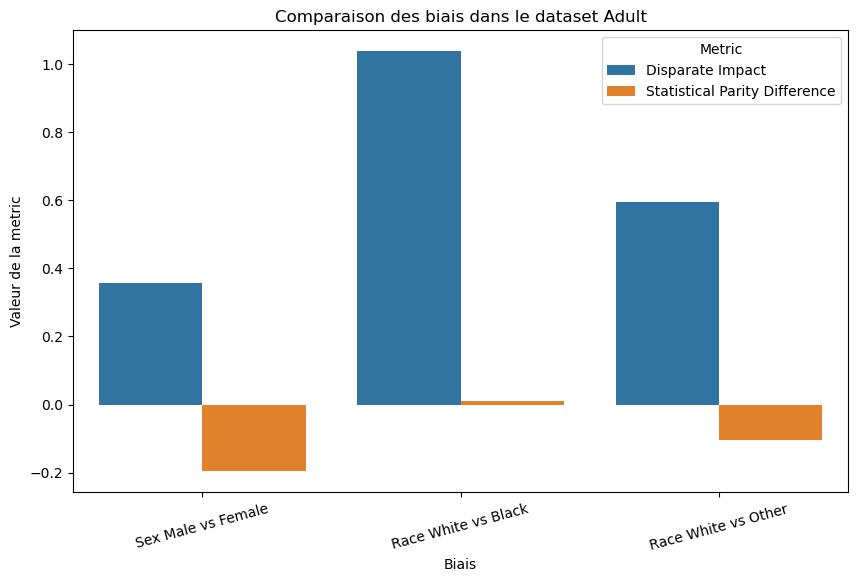

In [202]:
# -----------------------------
# 3️⃣ Créer un BinaryLabelDataset
# -----------------------------
dataset = BinaryLabelDataset(
    df=data,
    label_names=["target"],
    protected_attribute_names=["sex", "race"]
)

# -----------------------------
# 4️⃣ Calculer les metrics
# -----------------------------
def compute_metrics(dataset, protected_attr, privileged_val, unprivileged_val):
    metric = BinaryLabelDatasetMetric(
        dataset,
        privileged_groups=[{protected_attr: privileged_val}],
        unprivileged_groups=[{protected_attr: unprivileged_val}]
    )
    return metric.disparate_impact(), metric.mean_difference()

# Sexe : Male(1) vs Female(0)
sex_DI, sex_SPD = compute_metrics(dataset, "sex", 1, 0)

# Race : White(4) vs Black(1)  (selon LabelEncoder)
race_black_DI, race_black_SPD = compute_metrics(dataset, "race", 4, 1)

# Race : White(4) vs Other (tout sauf White=4) => créer un masque
other_mask = ~data["race"].isin([4])
data_other = data.copy()
data_other.loc[other_mask, "race"] = 0  # 0 = unprivileged group
dataset_other = BinaryLabelDataset(df=data_other, label_names=["target"], protected_attribute_names=["race"])
race_other_DI, race_other_SPD = compute_metrics(dataset_other, "race", 4, 0)

# -----------------------------
# 5️⃣ Créer un DataFrame pour le barplot
# -----------------------------
metrics_df = pd.DataFrame({
    "Biais": ["Sex Male vs Female", "Race White vs Black", "Race White vs Other"],
    "Disparate Impact": [sex_DI, race_black_DI, race_other_DI],
    "Statistical Parity Difference": [sex_SPD, race_black_SPD, race_other_SPD]
})

# -----------------------------
# 6️⃣ Barplot
# -----------------------------
plt.figure(figsize=(10,6))
metrics_df_melted = metrics_df.melt(id_vars="Biais", var_name="Metric", value_name="Value")
sns.barplot(x="Biais", y="Value", hue="Metric", data=metrics_df_melted)
plt.title("Comparaison des biais dans le dataset Adult")
plt.ylabel("Valeur de la metric")
plt.xticks(rotation=15)
plt.show()